In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import *
from keras.layers import *

In [2]:
data = pd.read_csv("/content/weatherAUS.csv", encoding_errors = "ignore")
print("The shape of the data is :", data.shape)
data.head()

The shape of the data is : (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
def preprocessing(data):
    categorical_cols = []
    continious_cols = []
    for col in data.columns:
        if data[col].dtypes == "object":
            # Categorical filteration
            categorical_cols.append(col)
            # Null imputation for object data
            data[col].fillna(data[col].mode()[0], inplace = True)

            # Converting Date column into datetime object and filtering day, month, day_name and year
            days = pd.to_datetime(data["Date"]).dt.day
            month = pd.to_datetime(data["Date"]).dt.month
            year = pd.to_datetime(data["Date"]).dt.year
            day_name = pd.to_datetime(data["Date"]).dt.day_name()
            data["days"] = days
            data["month"] = month
            data["year"] = year
            data["day_name"] = day_name
        else:
            data[col].fillna(data[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, data

categorical_cols,continious_cols, data_preprocessed = preprocessing(data)

In [4]:
print("The shape of the preprocessed data is : ",data_preprocessed.shape)
data_preprocessed.head()

The shape of the preprocessed data is :  (145460, 27)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,days,month,year,day_name
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,8.000000,4.50993,16.9,21.8,No,No,1,12,2008,Monday
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,4.447461,4.50993,17.2,24.3,No,No,2,12,2008,Tuesday
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,4.447461,2.00000,21.0,23.2,No,No,3,12,2008,Wednesday
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,4.447461,4.50993,18.1,26.5,No,No,4,12,2008,Thursday
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,7.000000,8.00000,17.8,29.7,No,No,5,12,2008,Friday


In [5]:
data_preprocessed.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
days             0
month            0
year             0
day_name         0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in data_preprocessed.columns:
    if data_preprocessed[col].dtypes =="object":
        data_preprocessed[col] = encoder.fit_transform(data_preprocessed[col])

In [7]:
data_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,days,month,year,day_name
0,396,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,8.000000,4.50993,16.9,21.8,0,0,1,12,2008,1
1,397,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,4.447461,4.50993,17.2,24.3,0,0,2,12,2008,5
2,398,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,4.447461,2.00000,21.0,23.2,0,0,3,12,2008,6
3,399,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,4.447461,4.50993,18.1,26.5,0,0,4,12,2008,4
4,400,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,7.000000,8.00000,17.8,29.7,0,0,5,12,2008,0


In [8]:
from sklearn.model_selection import train_test_split

X = data_preprocessed.drop(['RainTomorrow'], axis =1)
y = data_preprocessed['RainTomorrow']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

##### **Modelling**

In [9]:
# Making of a classifer that is sequential object
classifier = Sequential()

# Adding the first layer
classifier.add(Dense(units=6,
                     kernel_initializer="glorot_uniform",
                     activation= 'relu'))

# Adding the second layer
classifier.add(Dense(units=6,
                     kernel_initializer="glorot_uniform",
                     activation= 'relu'))

# Adding the second layer
classifier.add(Dense(units=1,
                     kernel_initializer="glorot_uniform",
                     activation= 'sigmoid'))

In [10]:
# compilation
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [17]:
input_shape =  X_train.shape
classifier.build(input_shape)

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (116368, 6)               162       
                                                                 
 dense_1 (Dense)             (116368, 6)               42        
                                                                 
 dense_2 (Dense)             (116368, 1)               7         
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [23]:
# import tensorflow as tf

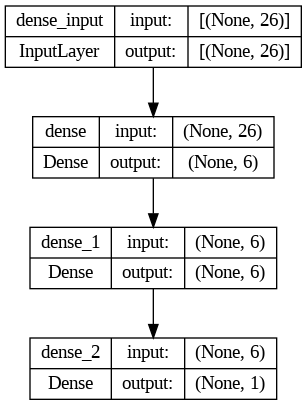

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file = "model_1.png", show_shapes=True)

## **Start the Training**

In [28]:
# Fitting the classifier with the data
model_history = classifier.fit(X_train,
                               y_train,
                               batch_size = 10,
                               epochs = 10)

Epoch 1/10
11637/11637 [==============================] - 26s 2ms/step - loss: 0.4321 - accuracy: 0.8149
Epoch 2/10
11637/11637 [==============================] - 23s 2ms/step - loss: 0.3983 - accuracy: 0.8276
Epoch 3/10
11637/11637 [==============================] - 25s 2ms/step - loss: 0.3906 - accuracy: 0.8327
Epoch 4/10
11637/11637 [==============================] - 25s 2ms/step - loss: 0.3883 - accuracy: 0.8333
Epoch 5/10
11637/11637 [==============================] - 25s 2ms/step - loss: 0.3869 - accuracy: 0.8332
Epoch 6/10
11637/11637 [==============================] - 24s 2ms/step - loss: 0.3846 - accuracy: 0.8349
Epoch 7/10
11637/11637 [==============================] - 25s 2ms/step - loss: 0.3824 - accuracy: 0.8356
Epoch 8/10
11637/11637 [==============================] - 26s 2ms/step - loss: 0.3807 - accuracy: 0.8366
Epoch 9/10
11637/11637 [==============================] - 24s 2ms/step - loss: 0.3802 - accuracy: 0.8359
Epoch 10/10
11637/11637 [==============================

In [29]:
model_history.history

{'loss': [0.43211960792541504,
  0.39832910895347595,
  0.39063242077827454,
  0.3882988393306732,
  0.3869251310825348,
  0.3845961093902588,
  0.38238561153411865,
  0.38071292638778687,
  0.38016602396965027,
  0.3791557252407074],
 'accuracy': [0.8148889541625977,
  0.827607274055481,
  0.832728922367096,
  0.8333304524421692,
  0.8332273364067078,
  0.8349374532699585,
  0.8356249332427979,
  0.8366389274597168,
  0.8358998894691467,
  0.8372662663459778]}

In [30]:
pd.DataFrame(model_history.history)

,loss,accuracy
0,0.432120,0.814889
1,0.398329,0.827607
2,0.390632,0.832729
3,0.388299,0.833330
4,0.386925,0.833227
5,0.384596,0.834937
6,0.382386,0.835625
7,0.380713,0.836639
8,0.380166,0.835900
9,0.379156,0.837266


Text(0.5, 1.0, 'Model  Acc')

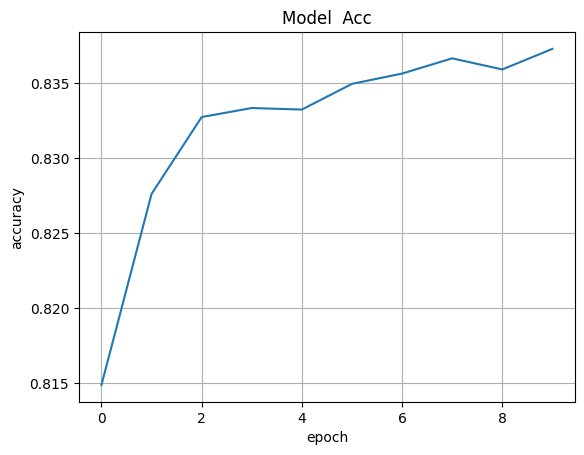

In [31]:
# Plotting accuracy
plt.plot(model_history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.title('Model  Acc')

Text(0.5, 1.0, 'Model  loss')

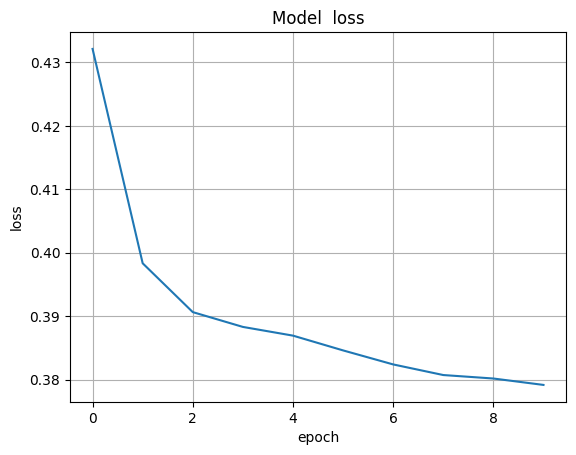

In [32]:
# Plotting accuracy
plt.plot(model_history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.title('Model  loss')

Text(0.5, 1.0, 'Model  Acc and loss')

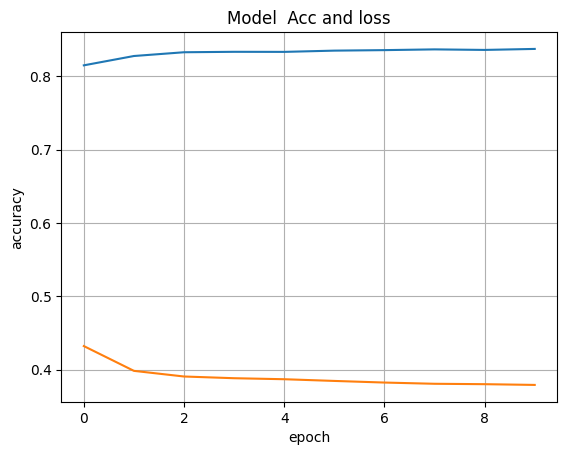

In [34]:
# Plotting accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.title('Model  Acc and loss')

## **Inference**

In [36]:
y_pred = classifier.predict(X_test)

910/910 [==============================] - 3s 3ms/step


In [42]:
y_pred_final = []
for pred in y_pred:
    #print(pred[0])
    if pred[0] > 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [43]:
y_pred_final

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [46]:
from sklearn.metrics import accuracy_score
print(f"The accuracy score for y_test and y_pred are : {accuracy_score(y_test,y_pred_final)*100} %")

The accuracy score for y_test and y_pred are : 83.72748521930427 %
